Zalando MNIST dataset Train Sequential Model
Sequential Model is set up as in clothingSequential.ipynb
add a dropout layer with a rate of 0.5 after the first dense layer to help
prevent overfitting. The dropout layer randomly drops out half of the
activations in the layer, which can help to prevent the model from
memorizing the training data.
plot the loss and accuracy curves for both training and validation data,

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

2024-04-12 10:52:43.791663: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-12 10:52:43.821805: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load the MNIST Fashion dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
# Scale pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
# Define the Sequential model with dropout regularization
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [5]:
# Compile the model with categorical cross-entropy loss and accuracy metric
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model with 10 epochs and batch size of 32
history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6126 - accuracy: 0.7813 - val_loss: 0.4586 - val_accuracy: 0.8319
Epoch 2/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4734 - accuracy: 0.8299 - val_loss: 0.4133 - val_accuracy: 0.8553
Epoch 3/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4396 - accuracy: 0.8397 - val_loss: 0.3930 - val_accuracy: 0.8582
Epoch 4/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4208 - accuracy: 0.8468 - val_loss: 0.3858 - val_accuracy: 0.8646
Epoch 5/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4072 - accuracy: 0.8528 - val_loss: 0.3807 - val_accuracy: 0.8628
Epoch 6/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3979 - accuracy: 0.8530 - val_loss: 0.3653 - val_accuracy: 0.8687
Epoch 7/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3869 - accuracy: 0.8580 - val_loss: 0.3651 - val_accuracy:

In [7]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 0s - loss: 0.3453 - accuracy: 0.8803 - 229ms/epoch - 733us/step
Test accuracy: 0.880299985408783


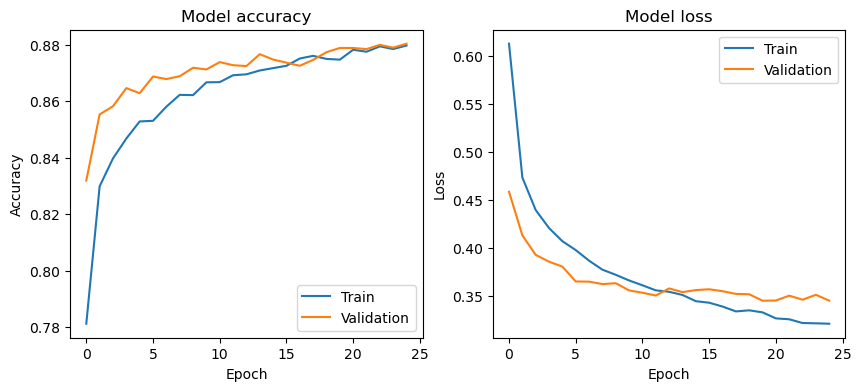

In [8]:
# Plot the training and validation accuracy and loss over time
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")

plt.show()

313/313 [==============================] - 0s 751us/step


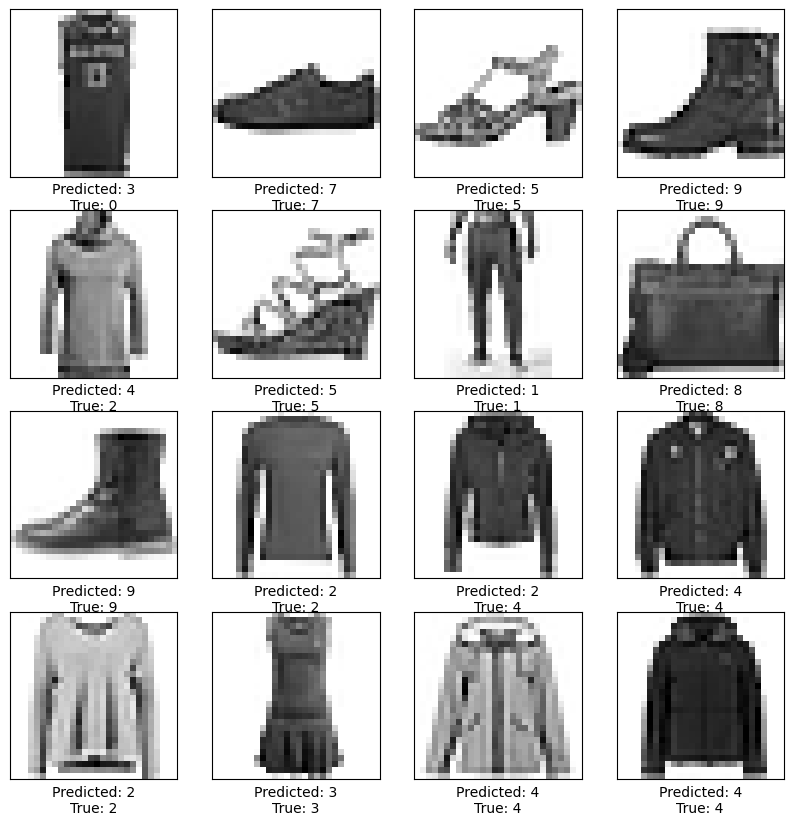

In [9]:
# Plot a random sample of test set images and their predicted labels
random_indices = np.random.choice(x_test.shape[0], 16, replace=False)
test_preds = np.argmax(model.predict(x_test), axis=1)
plt.figure(figsize=(10, 10))
for i, index in enumerate(random_indices):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[index], cmap=plt.cm.binary)
    plt.xlabel(f"Predicted: {test_preds[index]}\nTrue: {y_test[index]}")
plt.show()